In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=f5c8b3251723f41365b194ac5c97904b18d4e48c599508e66b46a2785c475032
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pandas as pd
import numpy as np
from pyspark.sql.types import IntegerType, FloatType, DoubleType

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
spark = (SparkSession.builder
                     .master('local')
                     .appName('spotify')
                     .config('spark.ui.port', '4050')
                     .getOrCreate())

In [ ]:
df_aisles = (spark.read
           .format('csv')
           .option('delimiter', ',')
           .option('header', 'true')
           .option('inferschema', 'true')
           .option('encoding', 'utf-8')
           .option('escape','"')
           .load('/content/aisles.csv')
           )

In [ ]:
df_departments = (spark.read
           .format('csv')
           .option('delimiter', ',')
           .option('header', 'true')
           .option('inferschema', 'true')
           .option('encoding', 'utf-8')
           .option('escape','"')
           .load('/content/departments.csv')
           )

In [ ]:
df_orders = (spark.read
           .format('csv')
           .option('delimiter', ',')
           .option('header', 'true')
           .option('inferschema', 'true')
           .option('encoding', 'utf-8')
           .option('escape','"')
           .load('/content/orders.csv')
           )

In [ ]:
df_products = (spark.read
           .format('csv')
           .option('delimiter', ',')
           .option('header', 'true')
           .option('inferschema', 'true')
           .option('encoding', 'utf-8')
           .option('escape','"')
           .load('/content/products.csv')
           )

In [ ]:
df_order_products_prior = (spark.read
           .format('csv')
           .option('delimiter', ',')
           .option('header', 'true')
           .option('inferschema', 'true')
           .option('encoding', 'utf-8')
           .option('escape','"')
           .load('/content/order_products__prior.csv')
           )

In [ ]:
#SHAPE aisle
print(f'({df_aisles.count()}, {len(df_aisles.columns)})')

(134, 2)


In [ ]:
#Analisar o esquema dos dados
df_aisles.printSchema()

root
 |-- aisle_id: integer (nullable = true)
 |-- aisle: string (nullable = true)



In [ ]:
#AMOSTRA DOS DADOS
df_aisles.show(truncate=False)

+--------+----------------------------+
|aisle_id|aisle                       |
+--------+----------------------------+
|1       |prepared soups salads       |
|2       |specialty cheeses           |
|3       |energy granola bars         |
|4       |instant foods               |
|5       |marinades meat preparation  |
|6       |other                       |
|7       |packaged meat               |
|8       |bakery desserts             |
|9       |pasta sauce                 |
|10      |kitchen supplies            |
|11      |cold flu allergy            |
|12      |fresh pasta                 |
|13      |prepared meals              |
|14      |tofu meat alternatives      |
|15      |packaged seafood            |
|16      |fresh herbs                 |
|17      |baking ingredients          |
|18      |bulk dried fruits vegetables|
|19      |oils vinegars               |
|20      |oral hygiene                |
+--------+----------------------------+
only showing top 20 rows



In [ ]:
#SHAPE departments
print(f'({df_departments.count()}, {len(df_departments.columns)})')

(21, 2)


In [ ]:
#Analisar o esquema dos dados
df_departments.printSchema()

root
 |-- department_id: integer (nullable = true)
 |-- department: string (nullable = true)



In [ ]:
#AMOSTRA DOS DADOS
df_departments.show(truncate=False)

+-------------+---------------+
|department_id|department     |
+-------------+---------------+
|1            |frozen         |
|2            |other          |
|3            |bakery         |
|4            |produce        |
|5            |alcohol        |
|6            |international  |
|7            |beverages      |
|8            |pets           |
|9            |dry goods pasta|
|10           |bulk           |
|11           |personal care  |
|12           |meat seafood   |
|13           |pantry         |
|14           |breakfast      |
|15           |canned goods   |
|16           |dairy eggs     |
|17           |household      |
|18           |babies         |
|19           |snacks         |
|20           |deli           |
+-------------+---------------+
only showing top 20 rows



In [ ]:
#SHAPE orders
print(f'({df_orders.count()}, {len(df_orders.columns)})')

(2873379, 7)


In [ ]:
#Analisar o esquema dos dados
df_orders.printSchema()

root
 |-- order_id: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- eval_set: string (nullable = true)
 |-- order_number: integer (nullable = true)
 |-- order_dow: integer (nullable = true)
 |-- order_hour_of_day: integer (nullable = true)
 |-- days_since_prior_order: double (nullable = true)



In [ ]:
#AMOSTRA DOS DADOS
df_orders.show(truncate=False)

+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------+--------+------------+---------+-----------------+----------------------+
|2539329 |1      |prior   |1           |2        |8                |null                  |
|2398795 |1      |prior   |2           |3        |7                |15.0                  |
|473747  |1      |prior   |3           |3        |12               |21.0                  |
|2254736 |1      |prior   |4           |4        |7                |29.0                  |
|431534  |1      |prior   |5           |4        |15               |28.0                  |
|3367565 |1      |prior   |6           |2        |7                |19.0                  |
|550135  |1      |prior   |7           |1        |9                |20.0                  |
|3108588 |1      |prior   |8           |1        |14               |14.0        

In [ ]:
#SHAPE products
print(f'({df_products.count()}, {len(df_products.columns)})')

(49688, 4)


In [ ]:
#Analisar o esquema dos dados
df_products.printSchema()

root
 |-- product_id: integer (nullable = true)
 |-- product_name: string (nullable = true)
 |-- aisle_id: integer (nullable = true)
 |-- department_id: integer (nullable = true)



In [ ]:
#AMOSTRA DOS DADOS
df_products.show(truncate=False)

+----------+-----------------------------------------------------------------+--------+-------------+
|product_id|product_name                                                     |aisle_id|department_id|
+----------+-----------------------------------------------------------------+--------+-------------+
|1         |Chocolate Sandwich Cookies                                       |61      |19           |
|2         |All-Seasons Salt                                                 |104     |13           |
|3         |Robust Golden Unsweetened Oolong Tea                             |94      |7            |
|4         |Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce|38      |1            |
|5         |Green Chile Anytime Sauce                                        |5       |13           |
|6         |Dry Nose Oil                                                     |11      |11           |
|7         |Pure Coconut Water With Orange                                   |98  

In [ ]:
#SHAPE order_product_prior
print(f'({df_order_products_prior.count()}, {len(df_order_products_prior.columns)})')

(266532, 4)


In [ ]:
#Analisar o esquema dos dados
#Tom, não esqueça do s no products
df_order_products_prior.printSchema()

root
 |-- order_id: integer (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- add_to_cart_order: integer (nullable = true)
 |-- reordered: integer (nullable = true)



In [ ]:
#AMOSTRA DOS DADOS
df_order_products_prior.show(truncate=False)

+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
|2       |33120     |1                |1        |
|2       |28985     |2                |1        |
|2       |9327      |3                |0        |
|2       |45918     |4                |1        |
|2       |30035     |5                |0        |
|2       |17794     |6                |1        |
|2       |40141     |7                |1        |
|2       |1819      |8                |1        |
|2       |43668     |9                |0        |
|3       |33754     |1                |1        |
|3       |24838     |2                |1        |
|3       |17704     |3                |1        |
|3       |21903     |4                |1        |
|3       |17668     |5                |1        |
|3       |46667     |6                |1        |
|3       |17461     |7                |1        |
|3       |32665     |8                |1        |


In [ ]:
df_aisles.count()

134

In [ ]:
df_departments.count()

21

In [ ]:
df_orders.count()

2873379

In [ ]:
df_order_products_prior.count()

266532

In [ ]:
df_products.count()

49688

In [ ]:
# Crie um novo DataFrame com a quantidade de registros de cada DataFrame
df_contagem = spark.createDataFrame([(df_aisles.count(), df_departments.count(), df_orders.count(), df_order_products_prior.count(), df_products.count())],
                                    ["aisles", "departments", "orders", "order_products_prior", "products"])

# Exiba o novo DataFrame
df_contagem.show()

+------+-----------+-------+--------------------+--------+
|aisles|departments| orders|order_products_prior|products|
+------+-----------+-------+--------------------+--------+
|   134|         21|2873379|              266532|   49688|
+------+-----------+-------+--------------------+--------+



In [ ]:
#EXISTEM VALORES NULOS NOS DATAFRAMES?
df_aisles.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df_aisles.columns]).show()

+--------+-----+
|aisle_id|aisle|
+--------+-----+
|       0|    0|
+--------+-----+



In [ ]:
#EXISTEM VALORES NULOS NOS DATAFRAMES?
df_departments.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df_departments.columns]).show()

+-------------+----------+
|department_id|department|
+-------------+----------+
|            0|         0|
+-------------+----------+



In [ ]:
#EXISTEM VALORES NULOS NOS DATAFRAMES?
df_orders.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df_orders.columns]).show()

+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------+--------+------------+---------+-----------------+----------------------+
|       0|      0|       0|           0|        0|                0|                173363|
+--------+-------+--------+------------+---------+-----------------+----------------------+



In [ ]:
#EXISTEM VALORES NULOS NOS DATAFRAMES?
df_products.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df_products.columns]).show()

+----------+------------+--------+-------------+
|product_id|product_name|aisle_id|department_id|
+----------+------------+--------+-------------+
|         0|           0|       0|            0|
+----------+------------+--------+-------------+



In [ ]:
#EXISTEM VALORES NULOS NOS DATAFRAMES?
df_order_products_prior.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df_order_products_prior.columns]).show()

+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
|       0|         0|                1|        1|
+--------+----------+-----------------+---------+



In [ ]:
df_order_products_prior.filter(F.col('product_id').isNull()).show()

+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
+--------+----------+-----------------+---------+



In [ ]:
#VAMOS DROPAR A LINHA QUE CONTEM VALORES NULOS, POIS É APENAS 1 REGISTRO EM MAIS DE 7 MILHÕES
df_order_products_prior.dropna(how='any')

DataFrame[order_id: int, product_id: int, add_to_cart_order: int, reordered: int]

In [ ]:
df_products.show()

+----------+--------------------+--------+-------------+
|product_id|        product_name|aisle_id|department_id|
+----------+--------------------+--------+-------------+
|         1|Chocolate Sandwic...|      61|           19|
|         2|    All-Seasons Salt|     104|           13|
|         3|Robust Golden Uns...|      94|            7|
|         4|Smart Ones Classi...|      38|            1|
|         5|Green Chile Anyti...|       5|           13|
|         6|        Dry Nose Oil|      11|           11|
|         7|Pure Coconut Wate...|      98|            7|
|         8|Cut Russet Potato...|     116|            1|
|         9|Light Strawberry ...|     120|           16|
|        10|Sparkling Orange ...|     115|            7|
|        11|   Peach Mango Juice|      31|            7|
|        12|Chocolate Fudge L...|     119|            1|
|        13|   Saline Nasal Mist|      11|           11|
|        14|Fresh Scent Dishw...|      74|           17|
|        15|Overnight Diapers..

In [ ]:
df_order_products_prior.show()

+--------+----------+-----------------+---------+
|order_id|product_id|add_to_cart_order|reordered|
+--------+----------+-----------------+---------+
|       2|     33120|                1|        1|
|       2|     28985|                2|        1|
|       2|      9327|                3|        0|
|       2|     45918|                4|        1|
|       2|     30035|                5|        0|
|       2|     17794|                6|        1|
|       2|     40141|                7|        1|
|       2|      1819|                8|        1|
|       2|     43668|                9|        0|
|       3|     33754|                1|        1|
|       3|     24838|                2|        1|
|       3|     17704|                3|        1|
|       3|     21903|                4|        1|
|       3|     17668|                5|        1|
|       3|     46667|                6|        1|
|       3|     17461|                7|        1|
|       3|     32665|                8|        1|


In [ ]:
# 1º JOIN - df_order_product_prior com order
df_join = df_order_products_prior.join(df_orders, on=['order_id'], how='left')

In [ ]:
# 2º JOIN df_joincom product
df_join = df_join.join(df_products, on=['product_id'], how='left')

In [ ]:
# 3º JOIN df_join com aisles
df_join = df_join.join(df_aisles, on=['aisle_id'], how='left')

In [ ]:
#4º JOIN df_join com department
df_join = df_join.join(df_departments, on=['department_id'], how='left')

In [ ]:
df_join.printSchema()

root
 |-- department_id: integer (nullable = true)
 |-- aisle_id: integer (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- order_id: integer (nullable = true)
 |-- add_to_cart_order: integer (nullable = true)
 |-- reordered: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- eval_set: string (nullable = true)
 |-- order_number: integer (nullable = true)
 |-- order_dow: integer (nullable = true)
 |-- order_hour_of_day: integer (nullable = true)
 |-- days_since_prior_order: double (nullable = true)
 |-- product_name: string (nullable = true)
 |-- aisle: string (nullable = true)
 |-- department: string (nullable = true)



In [ ]:
df_join.show()

+-------------+--------+----------+--------+-----------------+---------+-------+--------+------------+---------+-----------------+----------------------+--------------------+--------------------+-------------+
|department_id|aisle_id|product_id|order_id|add_to_cart_order|reordered|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|        product_name|               aisle|   department|
+-------------+--------+----------+--------+-----------------+---------+-------+--------+------------+---------+-----------------+----------------------+--------------------+--------------------+-------------+
|           16|      86|     33120|       2|                1|        1|   null|    null|        null|     null|             null|                  null|  Organic Egg Whites|                eggs|   dairy eggs|
|            4|      83|     28985|       2|                2|        1|   null|    null|        null|     null|             null|                  null|Michiga

In [ ]:
#EXISTEM VALORES NULOS NOS DATAFRAMES?
df_join.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df_join.columns]).show()

+-------------+--------+----------+--------+-----------------+---------+-------+--------+------------+---------+-----------------+----------------------+------------+-----+----------+
|department_id|aisle_id|product_id|order_id|add_to_cart_order|reordered|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|product_name|aisle|department|
+-------------+--------+----------+--------+-----------------+---------+-------+--------+------------+---------+-----------------+----------------------+------------+-----+----------+
|            0|       0|         0|       0|                1|        1|  42731|   42731|       42731|    42731|            42731|                 56875|           0|    0|         0|
+-------------+--------+----------+--------+-----------------+---------+-------+--------+------------+---------+-----------------+----------------------+------------+-----+----------+



In [ ]:
#DROPAR O ÚNICO REGISTRO QUE POSSUI DADOS NULOS EM AISLE E DEPARTMENT
df_join = df_join.dropna(how='any', subset='aisle')
df_join = df_join.dropna(how='any', subset='department')

In [ ]:
media = (df_join.filter(F.col('days_since_prior_order').isNull() | F.isnan(F.col('days_since_prior_order'))).count() / df_join.select('days_since_prior_order').count() * 100)

print(media)

21.338901145078264


In [ ]:
df = df_join

In [ ]:
df.show()

+-------------+--------+----------+--------+-----------------+---------+-------+--------+------------+---------+-----------------+----------------------+--------------------+--------------------+-------------+
|department_id|aisle_id|product_id|order_id|add_to_cart_order|reordered|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|        product_name|               aisle|   department|
+-------------+--------+----------+--------+-----------------+---------+-------+--------+------------+---------+-----------------+----------------------+--------------------+--------------------+-------------+
|           16|      86|     33120|       2|                1|        1|   null|    null|        null|     null|             null|                  null|  Organic Egg Whites|                eggs|   dairy eggs|
|            4|      83|     28985|       2|                2|        1|   null|    null|        null|     null|             null|                  null|Michiga

In [ ]:
df.groupBy(F.col('order_number')).agg(F.count('order_number').alias('n de pedidos')).orderBy(F.col('n de pedidos').desc()).show()

+------------+------------+
|order_number|n de pedidos|
+------------+------------+
|           1|       14144|
|           3|       14119|
|           2|       13907|
|           4|       13121|
|           5|       11183|
|           6|       10342|
|           7|        9160|
|           8|        8658|
|           9|        7297|
|          10|        7063|
|          11|        6246|
|          12|        5921|
|          13|        5792|
|          14|        5278|
|          16|        4476|
|          15|        4458|
|          17|        4436|
|          18|        4374|
|          19|        4183|
|          20|        3875|
+------------+------------+
only showing top 20 rows



In [ ]:
#QUANTIDADE DE PEDIDOS QUE MAIS APARECERAM
df.agg(F.mode('order_number').alias('moda')).show()

+----+
|moda|
+----+
|   1|
+----+



In [ ]:
df_orders.groupBy(F.col('order_dow')).agg(F.count('order_dow').alias('qtd_pedidos')).orderBy(F.col('qtd_pedidos').desc()).show()

+---------+-----------+
|order_dow|qtd_pedidos|
+---------+-----------+
|        0|     504465|
|        1|     493313|
|        2|     392148|
|        5|     381340|
|        6|     377356|
|        3|     367267|
|        4|     357490|
+---------+-----------+



In [ ]:
df_orders.show()

+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------+--------+------------+---------+-----------------+----------------------+
| 2539329|      1|   prior|           1|        2|                8|                  null|
| 2398795|      1|   prior|           2|        3|                7|                  15.0|
|  473747|      1|   prior|           3|        3|               12|                  21.0|
| 2254736|      1|   prior|           4|        4|                7|                  29.0|
|  431534|      1|   prior|           5|        4|               15|                  28.0|
| 3367565|      1|   prior|           6|        2|                7|                  19.0|
|  550135|      1|   prior|           7|        1|                9|                  20.0|
| 3108588|      1|   prior|           8|        1|               14|            

In [ ]:
df.show()

+-------------+--------+----------+--------+-----------------+---------+-------+--------+------------+---------+-----------------+----------------------+--------------------+--------------------+-------------+
|department_id|aisle_id|product_id|order_id|add_to_cart_order|reordered|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|        product_name|               aisle|   department|
+-------------+--------+----------+--------+-----------------+---------+-------+--------+------------+---------+-----------------+----------------------+--------------------+--------------------+-------------+
|           16|      86|     33120|       2|                1|        1|   null|    null|        null|     null|             null|                  null|  Organic Egg Whites|                eggs|   dairy eggs|
|            4|      83|     28985|       2|                2|        1|   null|    null|        null|     null|             null|                  null|Michiga

In [ ]:
df_orders.show()

+--------+-------+--------+------------+---------+-----------------+----------------------+
|order_id|user_id|eval_set|order_number|order_dow|order_hour_of_day|days_since_prior_order|
+--------+-------+--------+------------+---------+-----------------+----------------------+
| 2539329|      1|   prior|           1|        2|                8|                  null|
| 2398795|      1|   prior|           2|        3|                7|                  15.0|
|  473747|      1|   prior|           3|        3|               12|                  21.0|
| 2254736|      1|   prior|           4|        4|                7|                  29.0|
|  431534|      1|   prior|           5|        4|               15|                  28.0|
| 3367565|      1|   prior|           6|        2|                7|                  19.0|
|  550135|      1|   prior|           7|        1|                9|                  20.0|
| 3108588|      1|   prior|           8|        1|               14|            

In [ ]:
#dias_semana - CRIAR UMA LISTA COM DIAS DA SEMANA (0-6)
#total_pedidos - LISTA DA QUANTIDADE DE PEDIDOS POR DIA DA SEMANA
dias_semana = list(range(0, 7))
total_pedidos = [df_orders.filter(F.col('order_dow') == 0).count(),
                 df_orders.filter(F.col('order_dow') == 1).count(),
                 df_orders.filter(F.col('order_dow') == 2).count(),
                 df_orders.filter(F.col('order_dow') == 3).count(),
                 df_orders.filter(F.col('order_dow') == 4).count(),
                 df_orders.filter(F.col('order_dow') == 5).count(),
                 df_orders.filter(F.col('order_dow') == 6).count()]

In [ ]:
import matplotlib.pyplot as plt

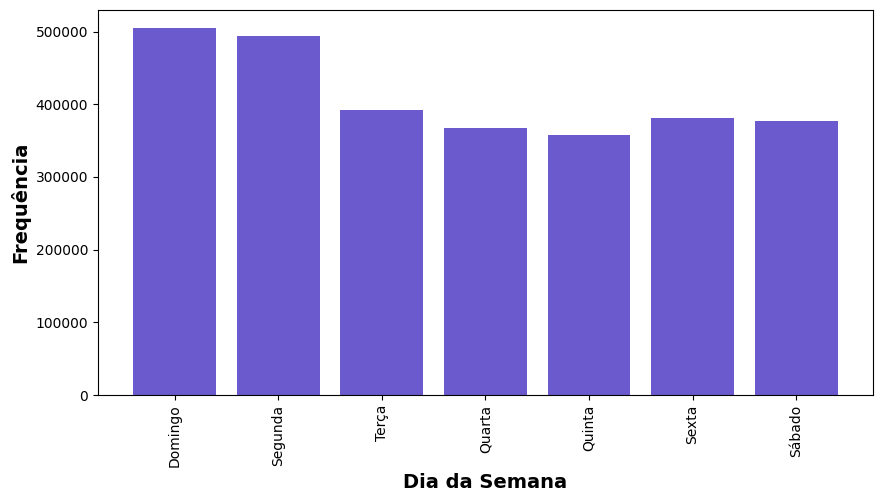

In [ ]:
# Plot
plt.figure(figsize = (10,5))
plt.bar(dias_semana,total_pedidos, color = 'slateblue')
plt.xlabel('Dia da Semana', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequência', fontsize = 14, fontweight = 'bold')
plt.xticks(dias_semana,['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado'], rotation = 'vertical')
plt.show()

In [ ]:
df_orders.groupBy(F.col('order_hour_of_day')).agg(F.count('order_hour_of_day').alias('qtd_pedidos')).orderBy(F.col('qtd_pedidos').desc()).show()

+-----------------+-----------+
|order_hour_of_day|qtd_pedidos|
+-----------------+-----------+
|               10|     241919|
|               11|     239062|
|               15|     238281|
|               14|     237674|
|               13|     233524|
|               12|     229100|
|               16|     228933|
|                9|     216351|
|               17|     192270|
|               18|     153845|
|                8|     149456|
|               19|     118523|
|               20|      87572|
|                7|      76893|
|               21|      66013|
|               22|      51926|
|               23|      33615|
|                6|      25604|
|                0|      19026|
|                1|      10286|
+-----------------+-----------+
only showing top 20 rows



In [ ]:
lista_horas = list(range(0, 24))
qtd_pedidos = []

for i in range(24):
  qtd_pedidos.append(df_orders.filter(F.col('order_hour_of_day') == i).count())

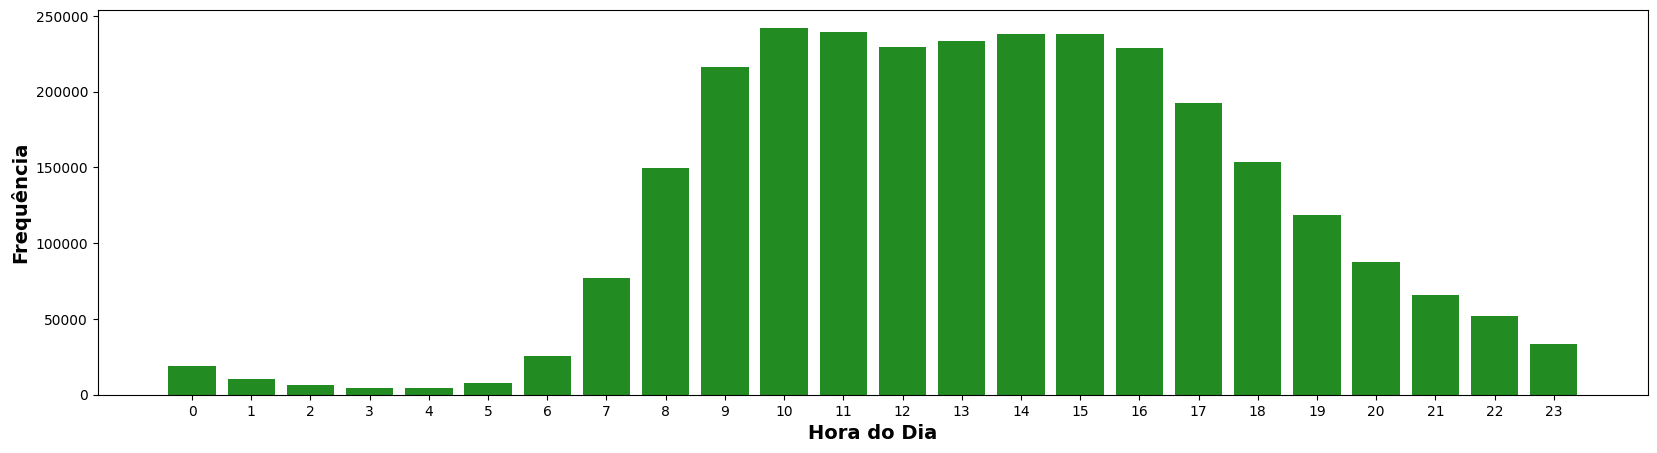

In [ ]:
# Plot
plt.figure(figsize = (20,5))
plt.bar(lista_horas,qtd_pedidos,color = 'forestgreen')
plt.xticks(np.arange(0,24,1))
plt.xlabel('Hora do Dia', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequência', fontsize = 14, fontweight = 'bold')
plt.show()